# 成績データの分析事例
擬似的に生成された 1,317件のサンプルデータを使用
　


In [ ]:
# グラフの日本語表示のために japanize-matplotlib をインストール
!pip install japanize-matplotlib

# ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
# GoogleDrive 内のデータを読み込むための準備
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# StudentsData.xlsx の読み込み
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/StudentsData.xlsx")
df

,ID,学部,性別,成績,出席率,国語,英語,数学,出身県
0,1,芸術,男,1.962,0.90,52.0,21.0,NaN,福岡県
1,2,理工,男,2.224,0.94,68.0,48.0,NaN,山口県
2,3,経済,男,1.355,0.58,64.0,7.0,35.0,長崎県
3,4,経済,女,1.847,0.65,NaN,NaN,NaN,福岡県
4,5,芸術,女,3.200,0.95,64.0,35.0,NaN,福岡県
...,...,...,...,...,...,...,...,...,...
1312,1313,体育,男,1.716,0.84,62.0,12.0,NaN,福岡県
1313,1314,経済,男,1.629,0.88,42.0,16.0,NaN,福岡県
1314,1315,体育,男,1.490,0.78,56.0,NaN,NaN,福岡県
1315,1316,芸術,女,3.080,0.93,68.0,67.0,NaN,宮崎県


In [10]:
# データフレームの基本情報
print('行数・列数：', df.shape)
print('項目名：', df.columns)
print('各列のデータ型：\n', df.dtypes)

行数・列数： (1317, 9)
項目名： Index(['ID', '学部', '性別', '成績', '出席率', '国語', '英語', '数学', '出身県'], dtype='object')
各列のデータ型：
 ID       int64
学部      object
性別      object
成績     float64
出席率    float64
国語     float64
英語     float64
数学     float64
出身県     object
dtype: object


In [12]:
# ID のデータ型を数値からobjectに変換
df['ID'] =  df['ID'].astype(object)

In [13]:
# 要約統計量の表示
df.describe()

,成績,出席率,国語,英語,数学
count,1317.000000,1317.000000,1272.000000,1268.000000,571.000000
mean,2.201790,0.839468,58.134434,45.489748,45.751313
std,0.777423,0.127979,15.117219,26.803104,25.056101
min,0.000000,0.200000,12.000000,0.000000,0.000000
25%,1.619000,0.780000,48.000000,23.000000,25.000000
50%,2.250000,0.870000,58.000000,44.000000,40.000000
75%,2.800000,0.940000,69.000000,67.000000,65.000000
max,3.870000,1.000000,96.000000,99.000000,100.000000


In [14]:
# 相関行列の表示
df.corr()

,成績,出席率,国語,英語,数学
成績,1.000000,0.750947,0.333202,0.440042,0.318398
出席率,0.750947,1.000000,0.116458,0.186118,0.233110
国語,0.333202,0.116458,1.000000,0.525278,0.379093
英語,0.440042,0.186118,0.525278,1.000000,0.527875
数学,0.318398,0.233110,0.379093,0.527875,1.000000


* 出席率と成績には、高い相関（0.75）があることがわかります。
* 国語・英語・数学のうち、GPAと最も相関が高いのが「英語（0.44）」です。

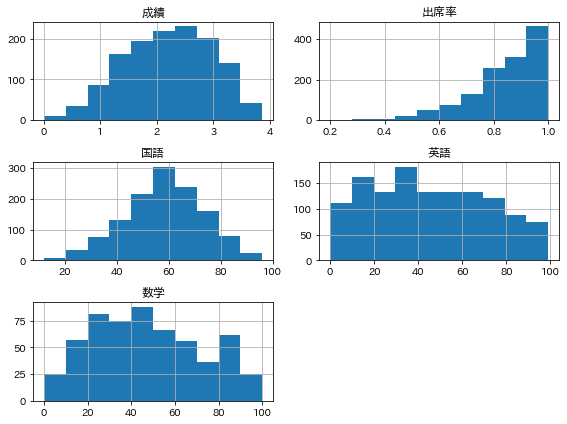

In [15]:
# ヒストグラムの表示

# グラフサイズを指定して表示
df.hist(figsize=(8,6))
plt.tight_layout()

## 学部別の分析

In [16]:
# 学部別のデータ件数（ value_counts() ）
faculty_counts = df['学部'].value_counts()
faculty_counts

経済    442
体育    287
芸術    255
理工    243
文学     90
Name: 学部, dtype: int64

In [17]:
# 学部別の男女の数｜クロス集計
cross_table_faculty = pd.crosstab( df['学部'] , df['性別'] )
cross_table_faculty

性別,女,男
学部,,
体育,66,221
文学,36,54
理工,77,166
経済,80,362
芸術,164,91


In [18]:
# 学部別の男女の数｜クロス集計 正規化
cross_table_n = pd.crosstab( df['学部'] , df['性別'] , normalize='index' )
cross_table_n

性別,女,男
学部,,
体育,0.229965,0.770035
文学,0.400000,0.600000
理工,0.316872,0.683128
経済,0.180995,0.819005
芸術,0.643137,0.356863


In [19]:
# 学部別の平均
faculty_mean = df.groupby('学部').mean()
faculty_mean

,成績,出席率,国語,英語,数学
学部,,,,,
体育,1.987226,0.812787,57.669091,41.755474,37.888889
文学,2.701511,0.894333,59.377778,52.300000,41.166667
理工,2.282263,0.888025,62.451883,55.000000,61.270588
経済,1.990937,0.789208,52.061321,38.437055,39.383459
芸術,2.555702,0.890980,64.524590,50.024590,39.187500


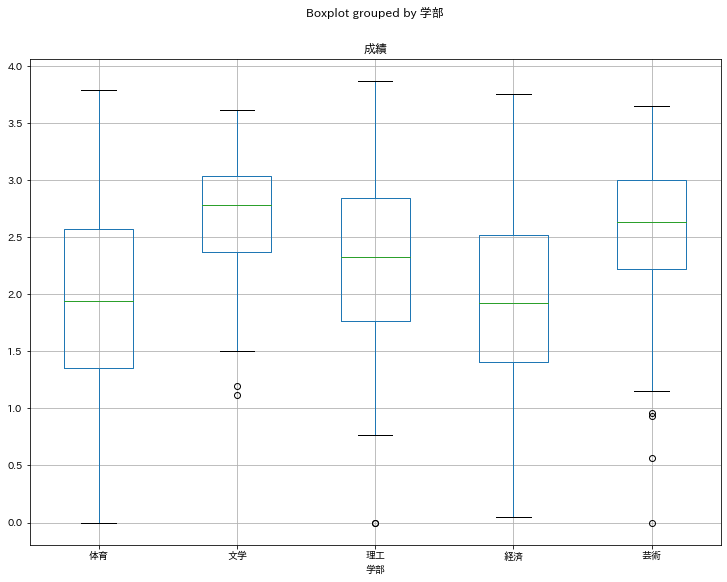

In [21]:
# pandas > japaneze_matplotlib で 学部ごとの成績を比較
df.boxplot( column="成績", by="学部", figsize=(12,9))

In [22]:
# 芸術学部のみのデータを抽出
df_geigaku = df.query( "学部 == '芸術' " )

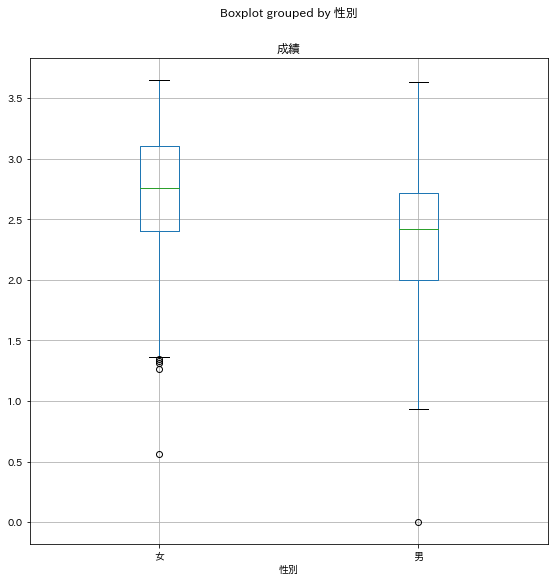

In [23]:
# 箱ひげ図｜芸術学部における男女の成績比較
df_geigaku.boxplot( column="成績", by="性別", figsize=(9,9))

## 出身県別の分析

In [24]:
# 出身県別のデータ件数（ value_counts() ）
pref_counts = df['出身県'].value_counts()
pref_counts

福岡県     824
長崎県      66
佐賀県      62
留学生      62
鹿児島県     58
山口県      53
宮崎県      43
大分県      40
熊本県      39
沖縄県      17
広島県      13
愛媛県       8
北海道       6
島根県       5
兵庫県       4
奈良県       4
静岡県       2
愛知県       2
茨城県       2
福井県       1
千葉県       1
山梨県       1
埼玉県       1
東京都       1
神奈川県      1
岡山県       1
Name: 出身県, dtype: int64

In [25]:
# 出身県別の各学部の数｜クロス集計
cross_table_pref = pd.crosstab( df['出身県'] , df['学部'] )
cross_table_pref

学部,体育,文学,理工,経済,芸術
出身県,,,,,
佐賀県,12,5,10,12,23
兵庫県,1,0,0,3,0
北海道,0,1,0,2,3
千葉県,0,0,0,1,0
埼玉県,0,0,0,1,0
大分県,7,3,10,11,9
奈良県,2,0,0,2,0
宮崎県,8,1,4,19,11
山口県,4,4,10,28,7


In [26]:
# 出身県別の平均
pref_mean = df.groupby('出身県').mean()
pref_mean

,成績,出席率,国語,英語,数学
出身県,,,,,
佐賀県,2.256403,0.860000,60.049180,45.819672,47.407407
兵庫県,2.312750,0.795000,66.250000,54.500000,87.000000
北海道,2.804833,0.866667,72.333333,53.833333,55.000000
千葉県,3.361000,0.920000,52.000000,49.000000,NaN
埼玉県,1.729000,0.780000,44.000000,15.000000,33.000000
大分県,2.240050,0.840000,55.425000,43.075000,47.315789
奈良県,2.132500,0.762500,53.250000,42.750000,33.333333
宮崎県,2.527279,0.845581,57.465116,50.046512,41.722222
山口県,2.238415,0.840943,60.692308,45.500000,50.434783


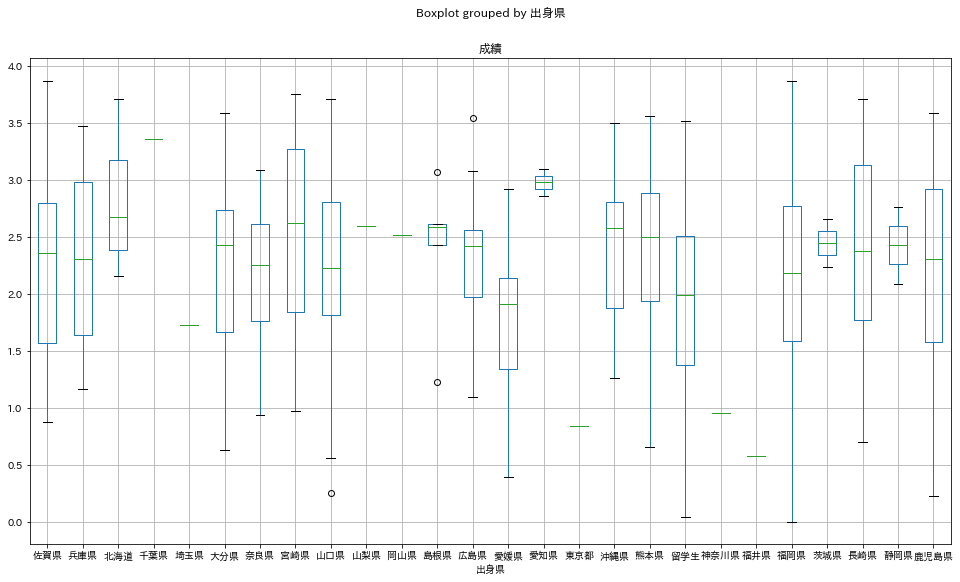

In [27]:
# pandas > japaneze_matplotlib で 出身県ごとの成績を比較
df.boxplot( column="成績", by="出身県", figsize=(16,9))

# その他参考

## 抽出・ソート

In [28]:
# 福岡県の行のみ抽出1
pref_fukuoka = df[ df['出身県'] == '福岡県' ]
pref_fukuoka

,ID,学部,性別,成績,出席率,国語,英語,数学,出身県
0,1,芸術,男,1.962,0.90,52.0,21.0,NaN,福岡県
3,4,経済,女,1.847,0.65,NaN,NaN,NaN,福岡県
4,5,芸術,女,3.200,0.95,64.0,35.0,NaN,福岡県
5,6,体育,男,3.261,0.96,62.0,63.0,30.0,福岡県
6,7,理工,男,2.324,0.98,54.0,56.0,80.0,福岡県
...,...,...,...,...,...,...,...,...,...
1311,1312,理工,女,2.843,0.99,50.0,75.0,64.0,福岡県
1312,1313,体育,男,1.716,0.84,62.0,12.0,NaN,福岡県
1313,1314,経済,男,1.629,0.88,42.0,16.0,NaN,福岡県
1314,1315,体育,男,1.490,0.78,56.0,NaN,NaN,福岡県


In [29]:
# 福岡のデータをGPAの順で並べ替え（ sort() 降順 ）
pref_fukuoka_gpa_sort = pref_fukuoka.sort_values('成績', ascending=False )
pref_fukuoka_gpa_sort

,ID,学部,性別,成績,出席率,国語,英語,数学,出身県
964,965,理工,男,3.870,0.97,62.0,69.0,100.0,福岡県
926,927,体育,男,3.786,0.91,70.0,65.0,70.0,福岡県
316,317,経済,女,3.758,0.85,84.0,96.0,NaN,福岡県
618,619,経済,女,3.758,0.91,76.0,73.0,NaN,福岡県
19,20,経済,男,3.700,0.97,78.0,91.0,65.0,福岡県
...,...,...,...,...,...,...,...,...,...
487,488,理工,男,0.000,0.46,NaN,NaN,NaN,福岡県
970,971,理工,男,0.000,0.51,70.0,65.0,88.0,福岡県
1081,1082,体育,男,0.000,0.44,62.0,16.0,40.0,福岡県
13,14,体育,女,0.000,0.30,70.0,26.0,40.0,福岡県


## 欠損データに関する処理

In [30]:
# 欠損値の確認
df.isnull().sum()

ID       0
学部       0
性別       0
成績       0
出席率      0
国語      45
英語      49
数学     746
出身県      0
dtype: int64

In [31]:
# 欠損値を含む行を削除
df = df.dropna(how='any')
# 状態の確認
print(df.shape)
df.isnull().sum()

(569, 9)


ID     0
学部     0
性別     0
成績     0
出席率    0
国語     0
英語     0
数学     0
出身県    0
dtype: int64

In [32]:
# 削除後の学部別のデータ件数を再確認（ value_counts() ）
faculty_counts = df['学部'].value_counts()
faculty_counts

理工    169
体育    162
経済    132
文学     90
芸術     16
Name: 学部, dtype: int64

In [33]:
# 使用しない列（単なる通し番号IDと欠損の多い数学の列）を削除
df.drop(columns=['ID','数学'], inplace=True)
df

,学部,性別,成績,出席率,国語,英語,出身県
2,経済,男,1.355,0.58,64.0,7.0,長崎県
5,体育,男,3.261,0.96,62.0,63.0,福岡県
6,理工,男,2.324,0.98,54.0,56.0,福岡県
7,理工,女,3.231,0.95,70.0,85.0,長崎県
8,理工,男,2.615,0.96,70.0,79.0,山口県
...,...,...,...,...,...,...,...
1299,経済,男,1.375,0.84,36.0,5.0,福岡県
1301,理工,男,1.448,0.90,38.0,12.0,福岡県
1305,体育,男,1.950,0.76,78.0,1.0,福岡県
1311,理工,女,2.843,0.99,50.0,75.0,福岡県
